In [5]:
! pip install ensaio


Original data:
  station_id  longitude  latitude  air_temperature_c  wind_speed_east_knots  \
0        0F2   -97.7756   33.6017           9.236111               1.032920   
1        11R   -96.3742   30.2189          14.214306               1.692155   
2        2F5  -101.9018   32.7479           7.069444              -1.110056   
3        3T5   -96.9500   29.9100          14.496761               1.695097   
4        5C1   -98.6946   29.7239          12.958333               1.271400   

   wind_speed_north_knots  
0               -2.357185  
1                2.982564  
2               -0.311412  
3                3.018448  
4                1.090743  

Trend estimator: Trend(degree=1)

Updated DataFrame:
  station_id  longitude  latitude  air_temperature_c  wind_speed_east_knots  \
0        0F2   -97.7756   33.6017           9.236111               1.032920   
1        11R   -96.3742   30.2189          14.214306               1.692155   
2        2F5  -101.9018   32.7479           7.06944

/home/yago/miniforge3/envs/micromag-euler-dipole/lib/python3.10/site-packages/verde/base/least_squares.py:68: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  regr.fit(jacobian, data.ravel(), sample_weight=weights)
/home/yago/miniforge3/envs/micromag-euler-dipole/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


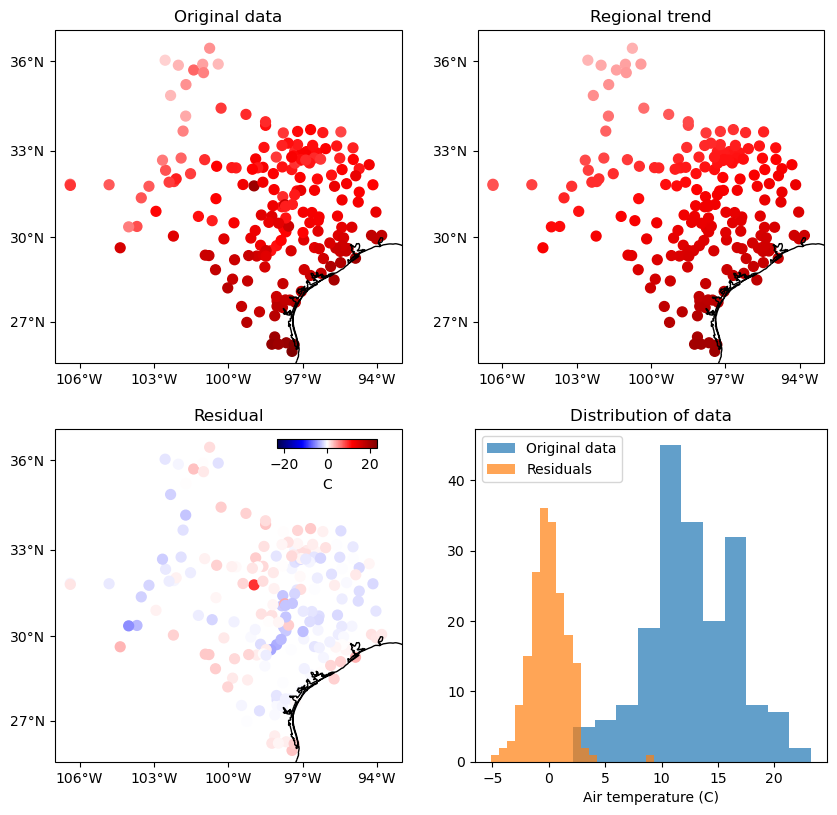

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import verde as vd

# Load the Texas wind and temperature data as a pandas.DataFrame
data = vd.datasets.fetch_texas_wind()
print("Original data:")
print(data.head())

# Fit a 1st degree 2D polynomial to the data
coordinates = (data.longitude, data.latitude)
trend = vd.Trend(degree=1).fit(coordinates, data.air_temperature_c)
print("\nTrend estimator:", trend)

# Add the estimated trend and the residual data to the DataFrame
data["trend"] = trend.predict(coordinates)
data["residual"] = data.air_temperature_c - data.trend
print("\nUpdated DataFrame:")
print(data.head())


# Make a function to plot the data using the same colorbar
def plot_data(column, i, title):
    "Plot the column from the DataFrame in the ith subplot"
    crs = ccrs.PlateCarree()
    ax = plt.subplot(2, 2, i, projection=ccrs.Mercator())
    ax.set_title(title)
    # Set vmin and vmax to the extremes of the original data
    maxabs = vd.maxabs(data.air_temperature_c)
    mappable = ax.scatter(
        data.longitude,
        data.latitude,
        c=data[column],
        s=50,
        cmap="seismic",
        vmin=-maxabs,
        vmax=maxabs,
        transform=crs,
    )
    # Set the proper ticks for a Cartopy map
    vd.datasets.setup_texas_wind_map(ax)
    return mappable


plt.figure(figsize=(10, 9.5))

# Plot the data fields and capture the mappable returned by scatter to use for
# the colorbar
mappable = plot_data("air_temperature_c", 1, "Original data")
plot_data("trend", 2, "Regional trend")
plot_data("residual", 3, "Residual")

# Make histograms of the data and the residuals to show that the trend was
# removed
ax = plt.subplot(2, 2, 4)
ax.set_title("Distribution of data")
ax.hist(data.air_temperature_c, bins="auto", alpha=0.7, label="Original data")
ax.hist(data.residual, bins="auto", alpha=0.7, label="Residuals")
ax.legend()
ax.set_xlabel("Air temperature (C)")

# Add a single colorbar on top of the histogram plot where there is some space
cax = plt.axes((0.35, 0.44, 0.10, 0.01))
cb = plt.colorbar(
    mappable,
    cax=cax,
    orientation="horizontal",
)
cb.set_label("C")

plt.show()

In [10]:
import ensaio
import pandas as pd

gravity = pd.read_csv(str(ensaio.fetch_southern_africa_gravity(version=1)))
topography = pd.read_csv(str(ensaio.fetch_earth_topography(version=1)))
geoid  = pd.read_csv(str(ensaio.fetch_earth_geoid(version=1)))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [7]:
gravity

PosixPath('/home/yago/.cache/ensaio/v1/southern-africa-gravity.csv.xz')